#### Name: Aamir Husain

# Deep learning from scratch
## Homework 2
### Exercise 2

-----

### General instructions

Complete the exercise listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells. 

### When submitting this homework:

Make sure you have put your name at the top of each file
    
Make sure all output is present in your notebook prior to submission

----

In [2]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

## <span style="color:#a50e3e;">Exercise 2. </span>  Perform two-class classification on a breast cancer dataset (10 points)

In this exercise you will repeat the experiment shown in [Section 9.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_4_Feature_scaling.html) comparing a run of gradient descent on standard and normalized data for two class classification using a real $N=8$ input breast cancer dataset, [a description of which you can find here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names).  You should repeat this experiment precisely: including using the same number of steps for each run, the same steplength values and initializations, and by producing the same cost funciton / misclassification history plots for each run of gradient descent.  This dataset is loaded in the cell below.

In [24]:
# data input
data = np.loadtxt('data/breast_cancer_data.csv',delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:].T

# # scatter plot the input data
# plt.figure()
# plt.scatter(x,y,color = 'k',edgecolor = 'w')
# plt.show()

w0 = 0.1*np.random.randn(x.shape[0]+1,1)

Note that you can find effecient `Python` implementations of both the softmax cost function [in Section 9.1.2](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) and the counting cost (for producing the number of misclassifications) [in Section 9.1.4](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) of the course notes.  Use these to produce both a plot of the cost function and misclassification count history for each run of gradient descent as shown in the example.

In [3]:
# Define necessary functions

# Linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# Softmax cost function
def softmax(x,y,w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

# Counting cost function
def counting_cost(x,y,w):
    cost = np.sum((np.sign(model(x,w)) - y)**2)
    return 0.25*cost 

# Gradient descent
def gradient_descent(g,alpha_choice,max_its,w):
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

# Standard normalization function 
def standard_normalizer(x):
    # compute the mean and standard deviation of the input
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]   

    # check to make sure thta x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In [4]:
## Gradient descent on original input
gamma = 1
a = 10**(-gamma)
iterations = 100
w0 = 0.1*np.random.randn(x.shape[0]+1,1)
g1 = lambda w: softmax(x,y,w)
c1 = lambda w: counting_cost(x,y,w)
weights, costs = gradient_descent(g1, a, iterations, w0)
counts = [c1(v) for v in weights]

## Gradient descent on normalized input
normalizer,inverse_normalizer = standard_normalizer(x)
x_norm = normalizer(x)

gamma = 1
a = 10**(-gamma)
iterations = 100
g2 = lambda w: softmax(x_norm,y,w)
c2 = lambda w: counting_cost(x_norm,y,w)
weights_norm, costs_norm = gradient_descent(g2, a, iterations, w0)
counts_norm = [c2(v) for v in weights_norm]

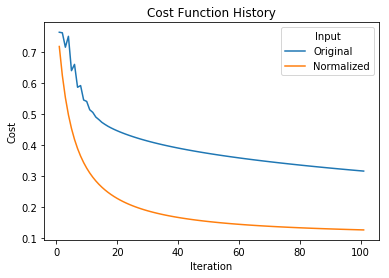

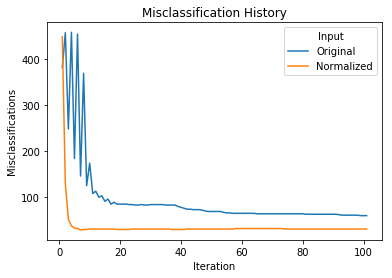

In [5]:
## Plot cost history
plt.figure()
plt.plot(np.linspace(1,iterations+1,iterations+1), costs, label = "Original")
plt.plot(np.linspace(1,iterations+1,iterations+1), costs_norm, label = "Normalized")
plt.title("Cost Function History")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(title = "Input", loc = "upper right")
plt.show

## Plot misclassification history
plt.figure()
plt.plot(np.linspace(1,iterations+1,iterations+1), counts, label = "Original")
plt.plot(np.linspace(1,iterations+1,iterations+1), counts_norm, label = "Normalized")
plt.title("Misclassification History")
plt.xlabel("Iteration")
plt.ylabel("Misclassifications")
plt.legend(title = "Input", loc = "upper right")
plt.show()